In [17]:
import sympy as sp
from sympy.physics import mechanics
import script as rt
from IPython import display
from IPython.lib.display import IFrame
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
t = sp.symbols('t')
mechanics.init_vprinting()  # за да скрати печатењето на (t) кај променливите кои зависат од времето

# 4.1

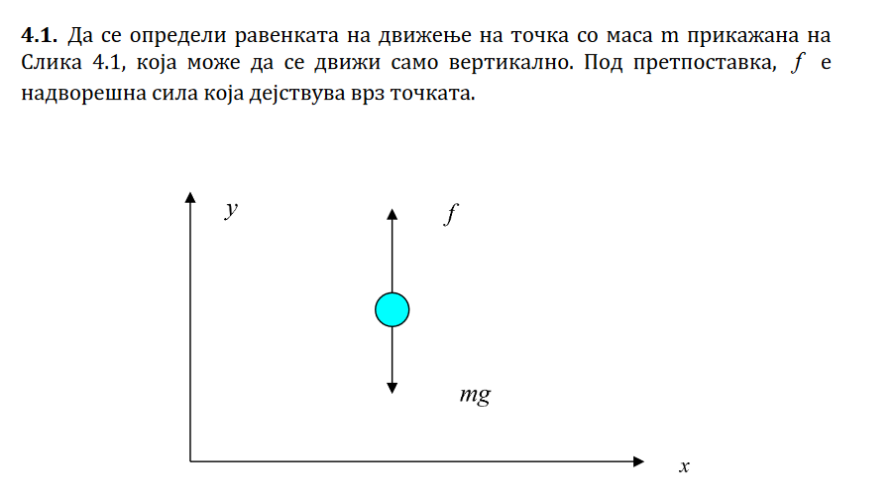

In [5]:
display.Image('images/4.1.png', width=700)

In [6]:
m, g = sp.symbols('m, g')
y = mechanics.dynamicsymbols('y')
y

y

In [7]:
vy = y.diff(t)
vy

ẏ

In [8]:
K = m * vy**2 / 2
K

   2
m⋅ẏ 
────
 2  

In [9]:
P = m * g * y
P

g⋅m⋅y

In [10]:
L = K - P
L

            2
         m⋅ẏ 
-g⋅m⋅y + ────
          2  

In [11]:
rt.lagrangian(L, [y])

[m⋅(g + ÿ)]

# 4.2

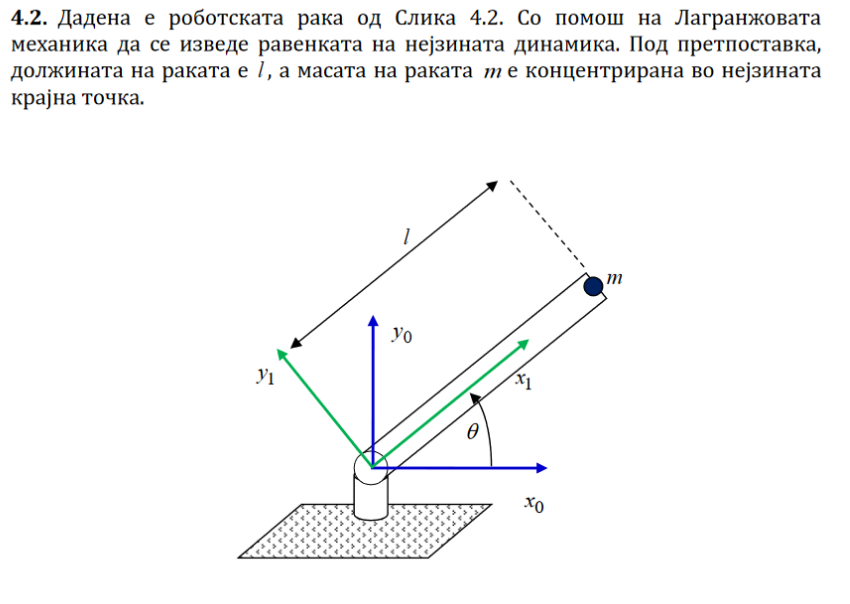

In [12]:
display.Image('images/4.2.png', width=700)

In [13]:
m, g, l = sp.symbols('m, g, l')
theta = mechanics.dynamicsymbols('theta')
theta

θ

In [14]:
x= l* sp.cos(theta)
x

l⋅cos(θ)

In [15]:
y= l* sp.sin(theta)
y

l⋅sin(θ)

In [17]:
vx = x.diff(t)
vx

-l⋅sin(θ)⋅θ̇

In [18]:
vy = y.diff(t)
vy

l⋅cos(θ)⋅θ̇

In [21]:
v2= vx**2+vy**2
v2.simplify()

 2  2
l ⋅θ̇ 

In [29]:
K = m * v / 2
K= sp.simplify(K)
K

 2    2
l ⋅m⋅θ̇ 
───────
   2   

In [30]:
P= m*g * y
P

g⋅l⋅m⋅sin(θ)

In [32]:
L=K-P
L

                 2    2
                l ⋅m⋅θ̇ 
-g⋅l⋅m⋅sin(θ) + ───────
                   2   

In [33]:
rt.lagrangian(L, [theta])

[l⋅m⋅(g⋅cos(θ) + l⋅θ̈)]

# 4.3

In [34]:
d1, d2 = sp.symbols('d1, d2')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,d1,0,-sp.pi/2)
robot.add_prismatic_joint(0,d2,0,0)
robot.interact()

In [50]:
m1, m2, g = sp.symbols('m1, m2, g')
d1, d2 = mechanics.dynamicsymbols('d1, d2')

In [76]:
vd1=d1.diff(t)
vd1

d₁̇

In [77]:
vd2=d2.diff(t)
vd2

d₂̇

In [78]:
K1= m1*vd1**2/2
K1

     2
m₁⋅d₁̇ 
──────
  2   

In [79]:
K2= m2*(vd1**2+vd2**2)/2
K2

   ⎛  2     2⎞
m₂⋅⎝d₁̇  + d₂̇ ⎠
──────────────
      2       

In [80]:
K=K1+K2
K

     2      ⎛  2     2⎞
m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠
────── + ──────────────
  2            2       

In [81]:
P=(m1+m2)*g*d1
P

g⋅(m₁ + m₂)⋅d₁

In [82]:
L=K-P
L

                       2      ⎛  2     2⎞
                  m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠
-g⋅(m₁ + m₂)⋅d₁ + ────── + ──────────────
                    2            2       

In [83]:
rt.lagrangian(L, [d1,d2])

⎡g⋅(m₁ + m₂) + m₁⋅d₁̈ + m₂⋅d₁̈⎤
⎢                           ⎥
⎣           m₂⋅d₂̈           ⎦

# 4.4

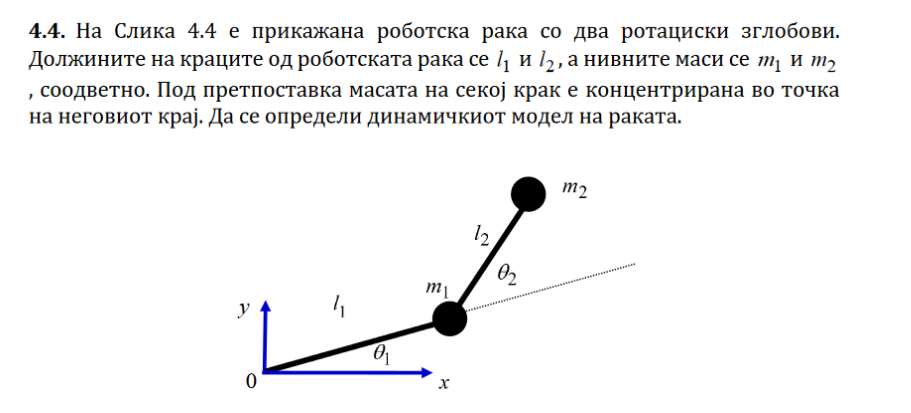

In [44]:
display.Image('images/4.4.png', width=700)

In [3]:
m1, m2, g, l1, l2 = sp.symbols('m1, m2, g, l1, l2')
theta1, theta2 = mechanics.dynamicsymbols('theta1, theta2')

In [4]:
x1=l1*sp.cos(theta1)
y1=l1*sp.sin(theta1)
vx1=x1.diff(t)
vy1=y1.diff(t)
v12=vx1**2+vy1**2
x2=l1*sp.cos(theta1)+l2*sp.cos(theta1+theta2)
y2=l1*sp.sin(theta1)+l2*sp.sin(theta1+theta2)
vx2=x2.diff(t)
vy2=y2.diff(t)
v22=vx2**2+vy2**2
v22

                                            2                                 
(-l₁⋅sin(θ₁)⋅θ₁̇ - l₂⋅(θ₁̇ + θ₂̇)⋅sin(θ₁ + θ₂))  + (l₁⋅cos(θ₁)⋅θ₁̇ + l₂⋅(θ₁̇ +

             2
 θ₂̇)⋅cos(θ₁ + θ₂)) 

In [7]:
K= m1*v12/2 + m2*v22/2
K= sp.simplify(K)
K

  2      2      ⎛  2   2                     2                             2  
l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + 
────────── + ─────────────────────────────────────────────────────────────────
    2                                                     2                   

 2       2           2   2⎞
l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ ⎠
───────────────────────────
                           

In [8]:
P= (m1+m2)*g*l1*sp.sin(theta1)+m2*g*l2*sp.sin(theta1+theta2)
P

g⋅l₁⋅(m₁ + m₂)⋅sin(θ₁) + g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)

In [9]:
L=K-P
L

                                                   2      2      ⎛  2   2     
                                                 l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝l₁ ⋅θ₁̇  + 
-g⋅l₁⋅(m₁ + m₂)⋅sin(θ₁) - g⋅l₂⋅m₂⋅sin(θ₁ + θ₂) + ────────── + ────────────────
                                                     2                        

                2                             2   2       2           2   2⎞
2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ₁̇⋅θ₂̇ + l₂
────────────────────────────────────────────────────────────────────────────
                             2                                              

In [10]:
rt.lagrangian(L, [theta1,theta2])

⎡                                                  2            ⎛  2          
⎢g⋅l₁⋅(m₁ + m₂)⋅cos(θ₁) + g⋅l₂⋅m₂⋅cos(θ₁ + θ₂) + l₁ ⋅m₁⋅θ₁̈ + m₂⋅⎝l₁ ⋅θ₁̈ - 2⋅
⎢                                                                             
⎢                                                         ⎛                   
⎣                                                   l₂⋅m₂⋅⎝g⋅cos(θ₁ + θ₂) + l₁

                                    2                                         
l₁⋅l₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ - l₁⋅l₂⋅sin(θ₂)⋅θ₂̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̈ + l₁⋅l₂⋅cos(θ
                                                                              
           2                                ⎞                                 
⋅sin(θ₂)⋅θ₁̇  + l₁⋅cos(θ₂)⋅θ₁̈ + l₂⋅θ₁̈ + l₂⋅θ₂̈⎠                             

    2        2   ⎞⎤
₂)⋅θ₂̈ + l₂ ⋅θ₁̈ + l₂ ⋅θ₂̈⎠⎥
                  ⎥
                  ⎥
                      ⎦

In [11]:
rt.dynamic_model_with_4_matrices(L, [theta1, theta2])

⎛⎡⎛  2        2                             2   ⎞                             
⎜⎢⎝l₁ ⋅m₁ + l₁ ⋅m₂ + 2⋅l₁⋅l₂⋅m₂⋅cos(θ₂) + l₂ ⋅m₂⎠⋅θ₁̈  l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)
⎜⎢                                                                            
⎜⎢                                                              2             
⎝⎣            l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)⋅θ₁̈                      l₂ ⋅m₂⋅θ₂̈     

  ⎤  ⎡                                          2⎤                            
⋅θ₂̈⎥  ⎢         0            -l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₂̇ ⎥  ⎡-2⋅l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁
  ⎥, ⎢                                           ⎥, ⎢                         
  ⎥  ⎢                   2                       ⎥  ⎣            0            
    ⎦  ⎣l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁̇             0          ⎦                         

                                                           ⎞
̇⋅θ₂̇⎤  ⎡g⋅(l₁⋅m₁⋅cos(θ₁) + l₁⋅m₂⋅cos(θ₁) + l₂⋅m₂⋅cos(θ₁ + θ₂))⎤⎟
⎥, ⎢                                                      ⎥⎟
⎦  ⎣                

# 4.5

In [12]:
gravity_vector = sp.Matrix([
    g * (m1 + m2) * l1 * sp.cos(theta1) + m2 * g * l1 * sp.cos(theta1 + theta2), 
    m2 * g * l1 * sp.cos(theta1 + theta2)])
gravity_vector

⎡g⋅l₁⋅m₂⋅cos(θ₁ + θ₂) + g⋅l₁⋅(m₁ + m₂)⋅cos(θ₁)⎤
⎢                                             ⎥
⎣            g⋅l₁⋅m₂⋅cos(θ₁ + θ₂)             ⎦

In [13]:
t = sp.symbols('t')
gravity_vector = gravity_vector.subs(l1, 2).subs(l2, 1).subs(m1, 5).subs(m2, 3)
gravity_vector = gravity_vector.subs(theta1, 4*sp.sin(t)).subs(theta2, 4*sp.sin(0.5*t)).subs(g, 9.81)
gravity_vector

⎡58.86⋅cos(4⋅sin(0.5⋅t) + 4⋅sin(t)) + 156.96⋅cos(4⋅sin(t))⎤
⎢                                                         ⎥
⎣           58.86⋅cos(4⋅sin(0.5⋅t) + 4⋅sin(t))            ⎦

In [14]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
time = np.linspace(0, 20, 100)
equation_1 = sp.lambdify(t, 4*sp.sin(t))
equation_2 = sp.lambdify(t, 4*sp.sin(0.5*t))
equation_3 = sp.lambdify(t, gravity_vector[0])
equation_4 = sp.lambdify(t, gravity_vector[1])

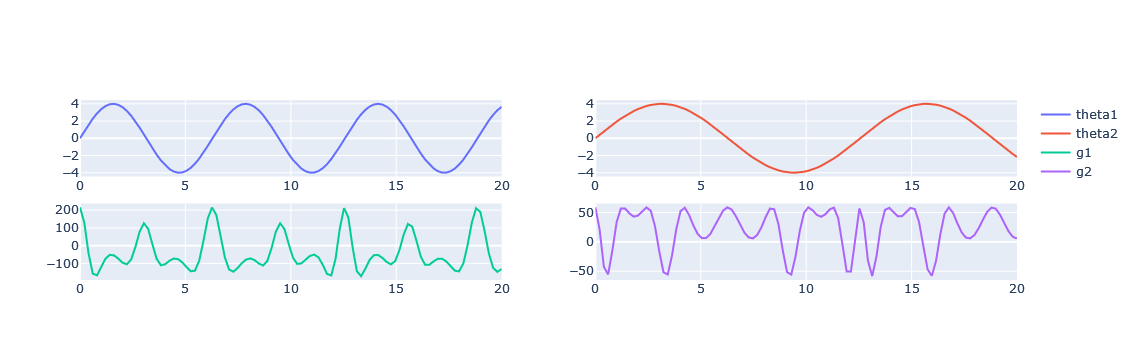

In [21]:
fig = make_subplots(rows=2, cols=2)
fig.add_trace(go.Scatter(x=time, y=equation_1(time), name = 'theta1'), row=1, col=1)
fig.add_trace(go.Scatter(x=time, y=equation_2(time), name = 'theta2'), row=1, col=2)
fig.add_trace(go.Scatter(x=time, y=equation_3(time), name = 'g1'), row=2, col=1)
fig.add_trace(go.Scatter(x=time, y=equation_4(time), name = 'g2'), row=2, col=2)
fig

# 4.6

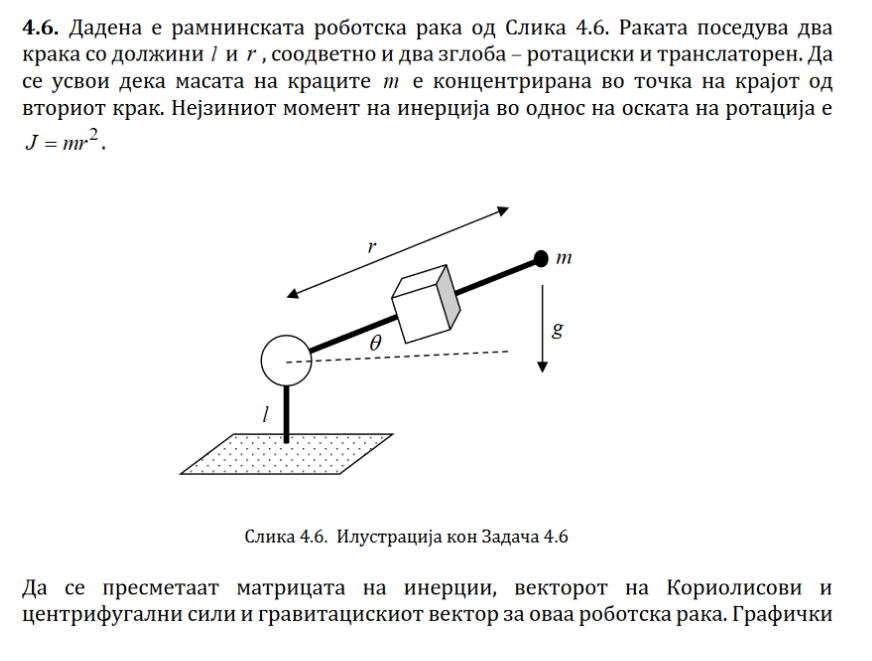

In [22]:
display.Image('images/4.6.png', width=700)

In [24]:
theta1, d2, l = sp.symbols('theta1, d2, l')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,l,0,sp.pi/2)
robot.add_revolute_joint(theta1,0,0,sp.pi/2)
robot.add_prismatic_joint(0,d2,0,0)
robot.add_subs([(l,1)])
robot.interact()

In [25]:
robot.get_dh_matrix()

⎡cos(θ₁)  0   sin(θ₁)     d₂⋅sin(θ₁)   ⎤
⎢                                      ⎥
⎢   0     -1     0             0       ⎥
⎢                                      ⎥
⎢sin(θ₁)  0   -cos(θ₁)  -d₂⋅cos(θ₁) + l⎥
⎢                                      ⎥
⎣   0     0      0             1       ⎦

In [26]:
m, g = sp.symbols('m, g')

In [27]:
theta, r = mechanics.dynamicsymbols('theta, r')

In [28]:
v1=theta.diff(t)
v2=r.diff(t)

In [30]:
K= m*r**2*v1**2/2 + m*v2**2/2
K= sp.simplify(K)
K

  ⎛ 2  2    2⎞
m⋅⎝r ⋅θ̇  + ṙ ⎠
──────────────
      2       

In [31]:
P= m*g*r*sp.sin(theta)
P

g⋅m⋅r⋅sin(θ)

In [32]:
L=K-P
L

                  ⎛ 2  2    2⎞
                m⋅⎝r ⋅θ̇  + ṙ ⎠
-g⋅m⋅r⋅sin(θ) + ──────────────
                      2       

In [33]:
rt.lagrangian(L, [theta,r])

⎡m⋅(g⋅cos(θ) + r⋅θ̈ + 2⋅ṙ⋅θ̇)⋅r⎤
⎢                            ⎥
⎢    ⎛              2    ⎞   ⎥
⎣  m⋅⎝g⋅sin(θ) - r⋅θ̇  + r̈⎠   ⎦

In [34]:
rt.dynamic_model_with_3_matrices(L, [theta, r])

⎛⎡   2       ⎤  ⎡   0     2⋅m⋅r⋅ṙ⋅θ̇  0⎤                ⎞
⎜⎢m⋅r ⋅θ̈   0 ⎥  ⎢                     ⎥  ⎡g⋅m⋅r⋅cos(θ)⎤⎟
⎜⎢           ⎥, ⎢      2              ⎥, ⎢            ⎥⎟
⎝⎣  0     m⋅r̈⎦  ⎣-m⋅r⋅θ̇       0      0⎦  ⎣ g⋅m⋅sin(θ) ⎦⎠

In [35]:
gravity_vector = sp.Matrix([m * g * r * sp.cos(theta), m * g * sp.sin(theta)])
gravity_vector

⎡g⋅m⋅r⋅cos(θ)⎤
⎢            ⎥
⎣ g⋅m⋅sin(θ) ⎦

In [36]:
gravity_vector = gravity_vector.subs(l, 1).subs(m, 1).subs(r, 0.5).subs(g, 9.81)
gravity_vector

⎡4.905⋅cos(θ)⎤
⎢            ⎥
⎣9.81⋅sin(θ) ⎦

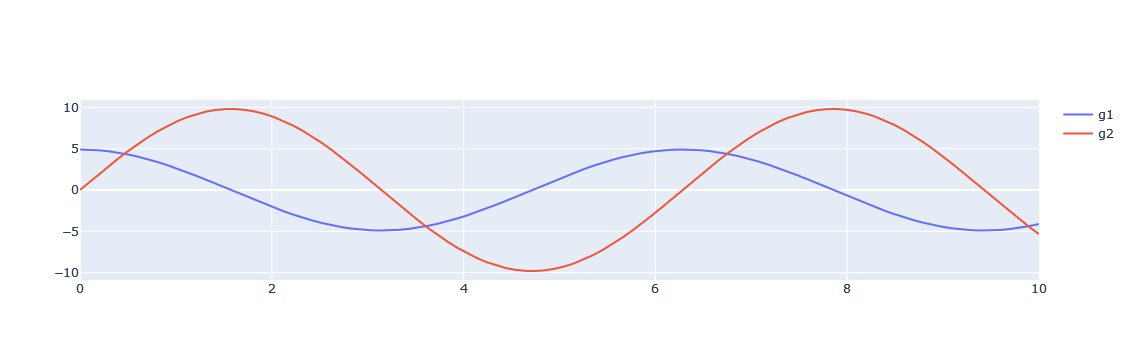

In [37]:
time = np.linspace(0, 10, 100)
equation_3 = sp.lambdify(theta, gravity_vector[0])
equation_4 = sp.lambdify(theta, gravity_vector[1])
scatter_1 = go.Scatter(x=time, y=equation_3(time), name = 'g1')
scatter_2 = go.Scatter(x=time, y=equation_4(time), name = 'g2')
fig = go.Figure([scatter_1, scatter_2])
fig